## 📈Lead Scoring Case Study

### 🟪Goals for this case study:

 - 1. Build a **Logistic Regression Model** to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 - 2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

---

### 🤔Problem Statement

An education company named **X Education** sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The **typical lead conversion rate at X education is around 30%**. 

Now, although X Education gets a lot of leads, its <ins>lead conversion rate is very poor</ins>. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as **‘Hot Leads’**. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

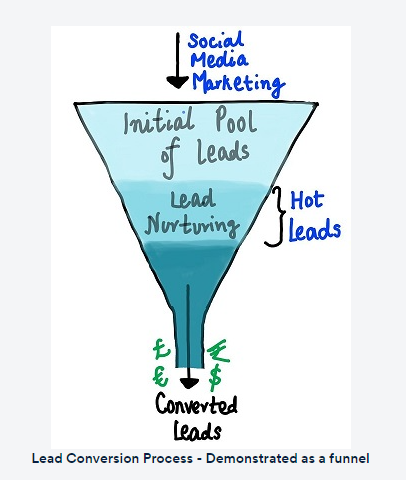

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

---

### 🚲Business Goal
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the **target lead conversion rate to be around 80%**.

---

## 1️⃣🔍Data understanding, preparation and EDA (~30%):

✅Meets expectations
 - Data quality checks, if any, are performed, and all data quality issues are addressed in the right way. 
 - Explanations for data quality issues are clearly mentioned in comments.
 - Categorical variables are handled appropriately.
 - Dummy variables are created properly wherever applicable.
 - New metrics are derived if applicable and are used for analysis and modelling.
 - The data is converted to a clean format suitable for analysis.

❌Does not meet expectations
 - Data quality checks, if any, are not done, data quality issues are not addressed correctly to an appropriate level.
 - Categorical variables are not handled appropriately where required.
 - Dummy variables are not created properly.
 - New metrics are not derived or are not used for analysis.
 - The data is not converted to a clean format which is suitable for analysis or is not cleaned using commands.

#### 🪶Data Dictionary

**Prospect ID**: Unique identifier for each customer (categorical).  
**Lead Number**: Lead number assigned to each lead procured (numerical).  
**Lead Origin**: Source through which the customer was identified as a lead (categorical).  
**Lead Source**: Indicates the specific source of the lead, such as Google, Organic Search, or Olark Chat (categorical).  
**Do Not Email**: Indicates whether the customer opted out of receiving emails (binary).  
**Do Not Call**: Indicates whether the customer opted out of receiving calls (binary).  
**Converted**: Target variable indicating whether a lead was successfully converted (binary).  
**TotalVisits**: Total number of visits made by the customer to the website (numerical).  
**Total Time Spent on Website**: Total time (in seconds) spent by the customer on the website (numerical).  
**Page Views Per Visit**: Average number of pages viewed per visit by the customer (numerical).  
**Last Activity**: Most recent activity performed by the customer (categorical).  
**Country**: Country of the customer (categorical).  
**Specialization**: Industry domain in which the customer worked (categorical).  
**How did you hear about X Education**: Source from which the customer learned about X Education (categorical).  
**What is your current occupation**: Indicates whether the customer is employed, unemployed, or a student (categorical).  
**What matters most to you in choosing this course**: Indicates the customer’s primary motive for taking the course (categorical).  
**Search**: Indicates whether the customer encountered the course through search (binary).  
**Magazine**: Indicates whether the customer encountered the course through a magazine (binary).  
**Newspaper Article**: Indicates whether the customer encountered the course through a newspaper article (binary).  
**X Education Forums**: Indicates whether the customer encountered the course through forums (binary).  
**Newspaper**: Indicates whether the customer encountered the course through a newspaper (binary).  
**Digital Advertisement**: Indicates whether the customer encountered the course through a digital advertisement (binary).  
**Through Recommendations**: Indicates whether the customer was referred by recommendations (binary).  
**Receive More Updates About Our Courses**: Indicates whether the customer opted for updates about the course (binary).  
**Tags**: Tags assigned to the lead indicating the current status (categorical).  
**Lead Quality**: Quality score assigned to the lead based on data and intuition (categorical).  
**Update me on Supply Chain Content**: Indicates whether the customer opted for supply chain content updates (binary).  
**Get updates on DM Content**: Indicates whether the customer opted for digital marketing content updates (binary).  
**Lead Profile**: A lead-level categorization based on the customer’s profile (categorical).  
**City**: City of the customer (categorical).  
**Asymmetrique Activity Index**: Activity-based index score for the customer (numerical).  
**Asymmetrique Profile Index**: Profile-based index score for the customer (numerical).  
**Asymmetrique Activity Score**: Activity score assigned to the customer (numerical).  
**Asymmetrique Profile Score**: Profile score assigned to the customer (numerical).  
**I agree to pay the amount through cheque**: Indicates whether the customer agreed to pay via cheque (binary).  
**A free copy of Mastering The Interview**: Indicates whether the customer opted for a free copy of "Mastering the Interview" (binary).  
**Last Notable Activity**: Last notable activity performed by the customer (categorical).

**File Reference**: [lead-scoring.csv](https://github.com/vmahawar/data-science-datasets-collection/raw/main/lead-scoring.csv)

#### 📝Data Preparation

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

#### 📚Import Libraries

In [391]:
# Lets us do the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import statsmodels.api as sm  

In [392]:
import warnings
warnings.filterwarnings('ignore') # ignore all the warnings that show up in the notebook

#### ✂️ EDA - Toolkit

In [393]:
class eda_toolkit:
    c_lead_dataset_file = 'https://github.com/vmahawar/data-science-datasets-collection/raw/main/lead-scoring.csv'
    c_threshold = 0.4
    c_train_size = 0.7
    c_test_size = 0.3    
    c_category_unknown = 'Unknown'
    category_col_list = []
    non_category_col_list = []
    columns_to_drop=[]
    
    @staticmethod
    def get_missing_count(p_df):
        return p_df.isnull().sum().sort_values(ascending=False)   
    
    @staticmethod
    def get_missing_col_count(p_df,p_col):
        return p_df[p_col].isnull().sum()
    
    @staticmethod
    def reset_cols_to_drop():
        eda_toolkit.columns_to_drop = []
    
    @staticmethod
    def add_cols_to_drop(p_col,p_reason):
        eda_toolkit.columns_to_drop.append((p_col,p_reason))
        return eda_toolkit.columns_to_drop
    
    @staticmethod
    def get_cols_to_drop(p_only_col_names=True):
        if p_only_col_names:
            cols = [eda_toolkit.columns_to_drop[i][0] for i in range(len(eda_toolkit.columns_to_drop))]
            return cols
        else:
            return eda_toolkit.columns_to_drop   
        
    @staticmethod    
    def map_to_categorical(p_df,p_col,p_dict):
        return p_df[p_col].map(p_dict)         
        
    #For Visulation and Analysis
    @staticmethod
    def plt_category_count(p_df,p_col,p_type='v'):
        # plt.figure(figsize=[10,5])
        if p_type == 'v':
            p_df[p_col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
        elif p_type == 'h':
            p_df[p_col].value_counts(normalize=True).sort_values(ascending=False).plot.barh()            
        plt.xlabel('Count')
        plt.ylabel(p_col)
        plt.title(f'Percentage of different {p_col}')

#### 🔃Load dataset Bikesharing-Dataset.csv

In [394]:
lead_df = pd.read_csv(eda_toolkit.c_lead_dataset_file)
lead_df.shape

(9240, 37)

In [395]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [396]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Get Missing Counts

In [397]:
eda_toolkit.get_missing_count(lead_df)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [398]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [399]:
lead_df[['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course']].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects


In [400]:
lead_df[['Prospect ID', 'Lead Number', 'Converted','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations']].head()

,Prospect ID,Lead Number,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,No,No,No,No,No,No,No
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,No,No,No,No,No,No,No


In [401]:
lead_df[['Prospect ID', 'Lead Number', 'Converted','Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']].head()

,Prospect ID,Lead Number,Converted,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


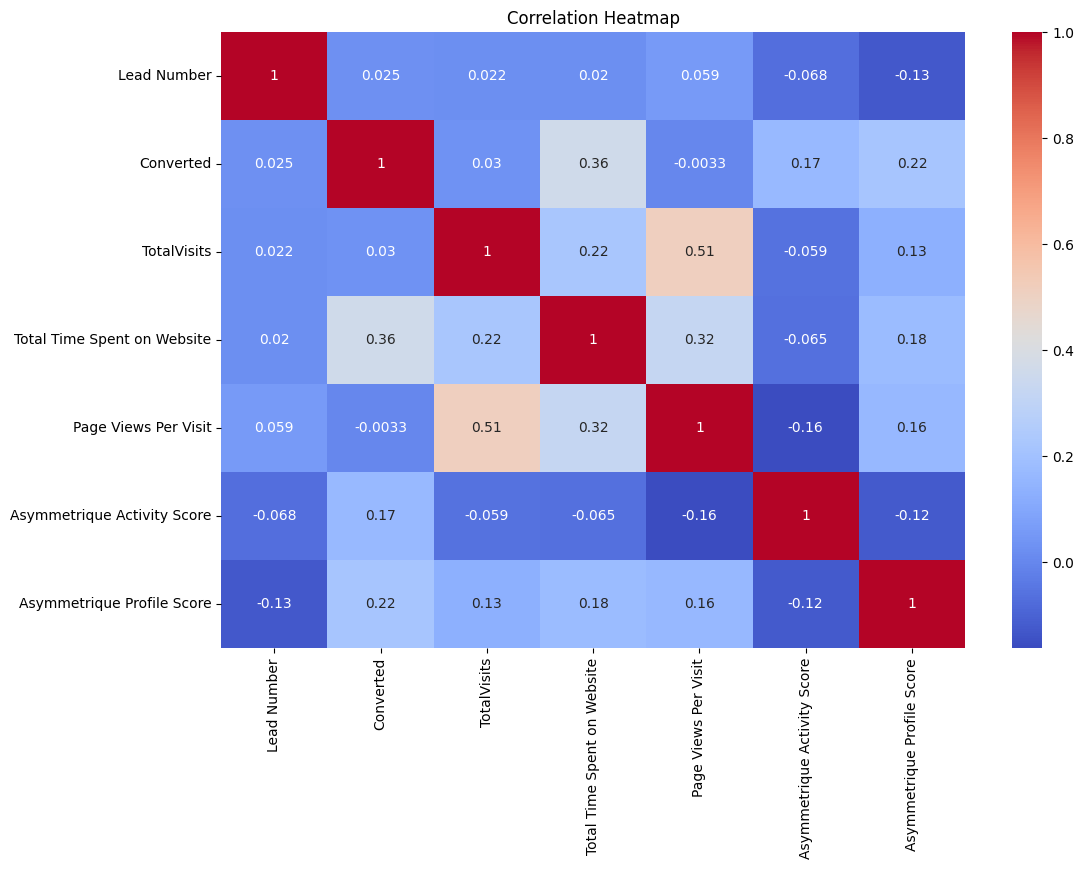

In [402]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(lead_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [403]:
# Visualizing categorical variables
categorical_cols = lead_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [404]:
eda_toolkit.category_col_list = categorical_cols.drop('Prospect ID')

In [405]:
eda_toolkit.category_col_list

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [406]:
# for col in categorical_cols:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=lead_df[col], order=lead_df[col].value_counts().index)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel('Count')
#     plt.ylabel(col)
#     plt.show()

In [407]:
# Pairplot for numerical features (for smaller datasets)
numerical_cols = lead_df.select_dtypes(include=['float64', 'int64', 'int32']).columns
numerical_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [408]:
numerical_cols = numerical_cols.drop('Lead Number')

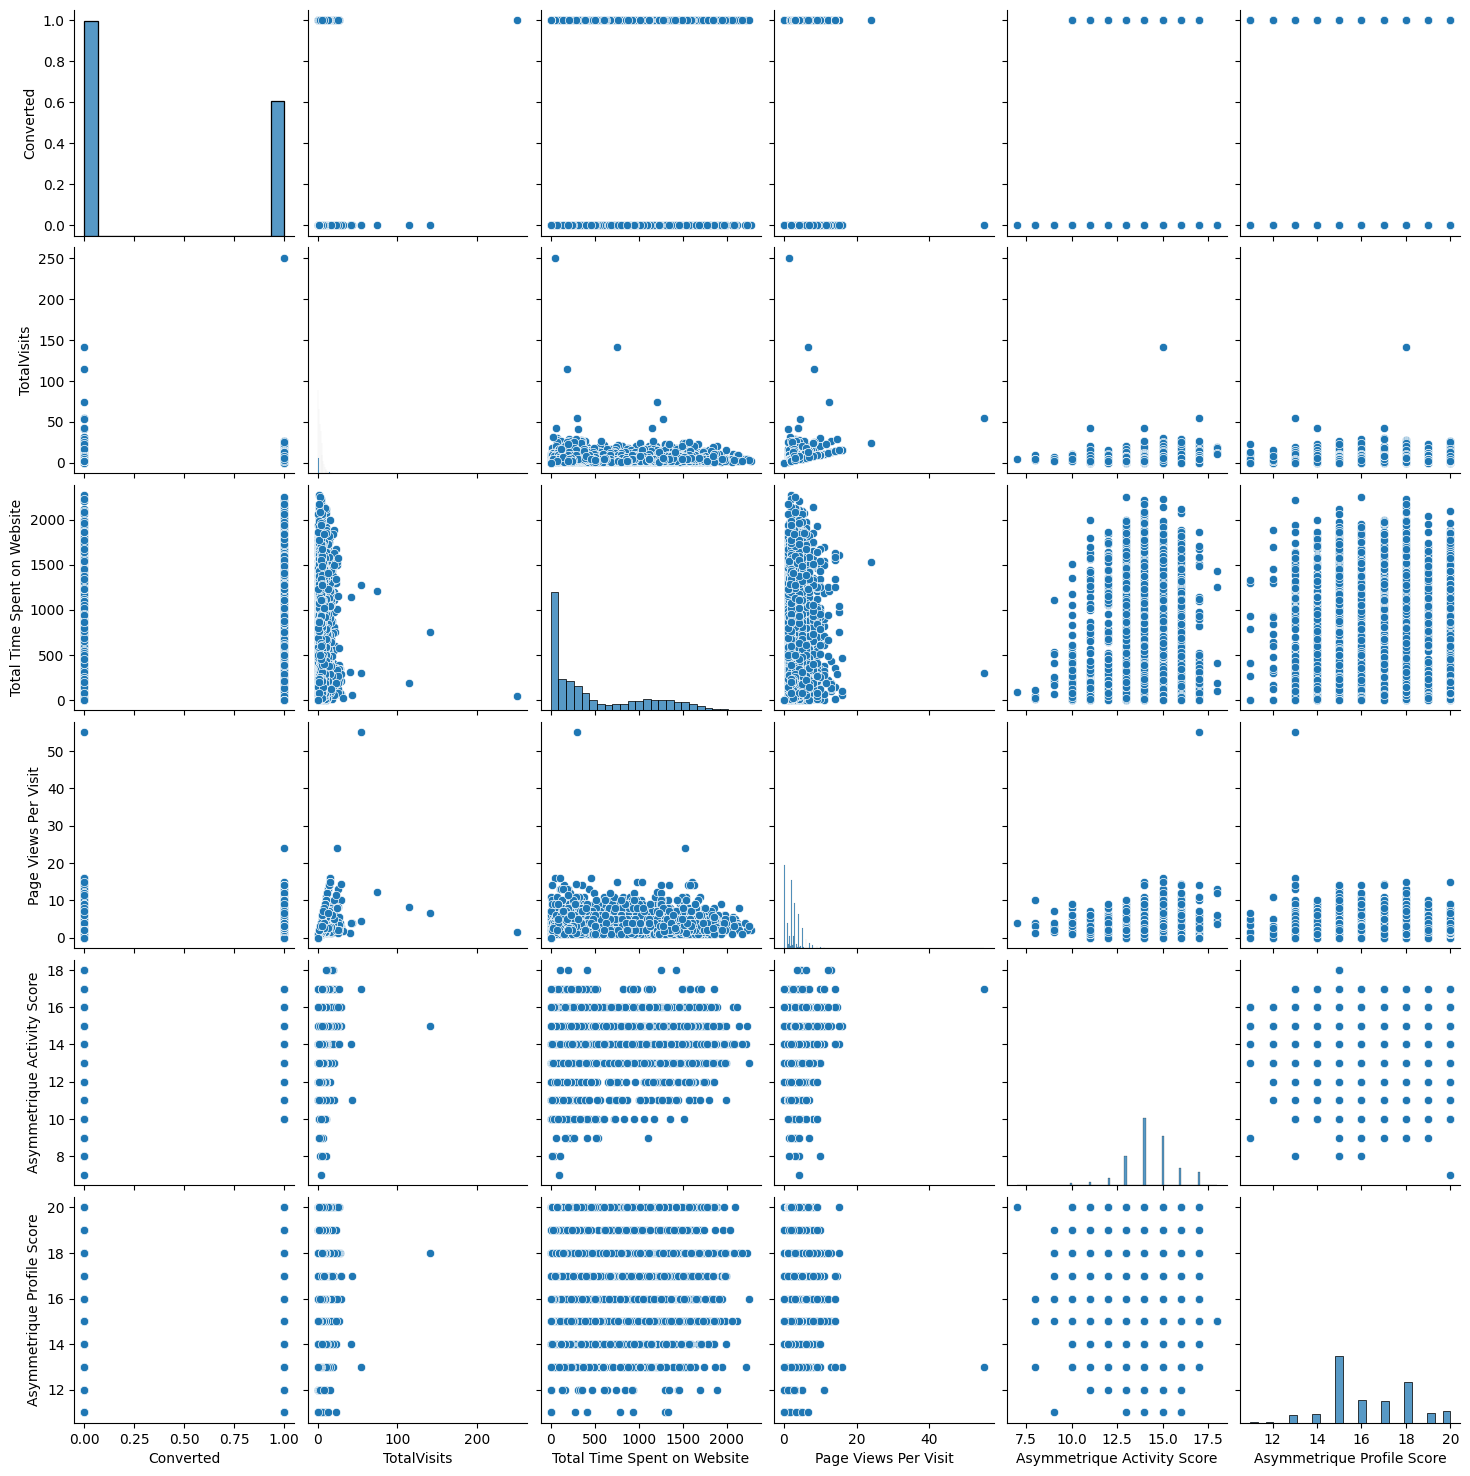

In [409]:
if len(numerical_cols) <= 7:
    sns.pairplot(lead_df[numerical_cols])
    plt.show()
else:
    print("\nPairplot skipped due to too many numerical columns.")

#### 🛠️Pre-Processing

##### Pre-Processing to drop the columns not required

In [410]:
# 1. Identifying columns with high missing values
missing_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
high_missing_cols = missing_percentage[missing_percentage > 40].index.tolist()
print("Columns with >40% missing values:", high_missing_cols)

Columns with >40% missing values: ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [411]:
# 2. Identifying columns with low variance
low_variance_cols = [col for col in lead_df.columns if lead_df[col].nunique() == 1]
print("Columns with low variance:", low_variance_cols)

Columns with low variance: ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [412]:
# 3. Identifying irrelevant columns
irrelevant_cols = ['Prospect ID', 'Lead Number']  # Assuming these columns are identifiers
print("Irrelevant columns to drop:", irrelevant_cols)

Irrelevant columns to drop: ['Prospect ID', 'Lead Number']


In [413]:
# 4. Identifying highly correlated columns
correlation_matrix = lead_df.corr(numeric_only=True)
correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highly_correlated_cols = [
    (col1, col2) for col1, col2 in correlated_pairs.index 
    if col1 != col2 and correlation_matrix.loc[col1, col2] > 0.9
]
print("Highly correlated columns:", highly_correlated_cols)

Highly correlated columns: []


In [414]:
# 5. Checking for duplicate columns (if any)
duplicate_cols = lead_df.columns[lead_df.T.duplicated()].tolist()
print("Duplicate columns:", duplicate_cols)

Duplicate columns: ['Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [415]:
# Final list of columns to consider dropping
columns_to_drop = list(set(high_missing_cols + low_variance_cols + irrelevant_cols + duplicate_cols))
print("Columns recommended for dropping:", columns_to_drop)


Columns recommended for dropping: ['Prospect ID', 'Update me on Supply Chain Content', 'Asymmetrique Activity Score', 'Get updates on DM Content', 'Magazine', 'Lead Quality', 'I agree to pay the amount through cheque', 'Lead Number', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score', 'Asymmetrique Activity Index', 'Receive More Updates About Our Courses']


In [416]:
# Combine all columns to drop
columns_to_drop = list(set(high_missing_cols + low_variance_cols + irrelevant_cols + duplicate_cols))

# Print the drop command
lead_df = lead_df.drop(columns=columns_to_drop)


In [417]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [418]:
# Identify categorical columns in the DataFrame
categorical_cols = lead_df.select_dtypes(include=['object', 'category']).columns

# Applying one-hot encoding to the filtered data
encoded_data = pd.get_dummies(lead_df, columns=categorical_cols, drop_first=True, prefix=categorical_cols, prefix_sep='_dummy_')

# Displaying the resulting dataset
print("Shape of the dataset after one-hot encoding:", encoded_data.shape)

Shape of the dataset after one-hot encoding: (9240, 175)


In [419]:
encoded_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_dummy_Landing Page Submission,Lead Origin_dummy_Lead Add Form,Lead Origin_dummy_Lead Import,Lead Origin_dummy_Quick Add Form,Lead Source_dummy_Direct Traffic,Lead Source_dummy_Facebook,...,Last Notable Activity_dummy_Form Submitted on Website,Last Notable Activity_dummy_Had a Phone Conversation,Last Notable Activity_dummy_Modified,Last Notable Activity_dummy_Olark Chat Conversation,Last Notable Activity_dummy_Page Visited on Website,Last Notable Activity_dummy_Resubscribed to emails,Last Notable Activity_dummy_SMS Sent,Last Notable Activity_dummy_Unreachable,Last Notable Activity_dummy_Unsubscribed,Last Notable Activity_dummy_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [420]:
data = encoded_data

# Identifying categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encoding categorical columns using Label Encoding (for simplicity)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  # Store the encoder for future reference

In [421]:
for i in data.columns:
    print(i)

Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Lead Origin_dummy_Landing Page Submission
Lead Origin_dummy_Lead Add Form
Lead Origin_dummy_Lead Import
Lead Origin_dummy_Quick Add Form
Lead Source_dummy_Direct Traffic
Lead Source_dummy_Facebook
Lead Source_dummy_Google
Lead Source_dummy_Live Chat
Lead Source_dummy_NC_EDM
Lead Source_dummy_Olark Chat
Lead Source_dummy_Organic Search
Lead Source_dummy_Pay per Click Ads
Lead Source_dummy_Press_Release
Lead Source_dummy_Reference
Lead Source_dummy_Referral Sites
Lead Source_dummy_Social Media
Lead Source_dummy_WeLearn
Lead Source_dummy_Welingak Website
Lead Source_dummy_bing
Lead Source_dummy_blog
Lead Source_dummy_google
Lead Source_dummy_testone
Lead Source_dummy_welearnblog_Home
Lead Source_dummy_youtubechannel
Do Not Email_dummy_Yes
Do Not Call_dummy_Yes
Last Activity_dummy_Converted to Lead
Last Activity_dummy_Email Bounced
Last Activity_dummy_Email Link Clicked
Last Activity_dummy_Email Marked Spam
Last Activit

In [422]:
# Displaying the transformed dataset
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_dummy_Landing Page Submission,Lead Origin_dummy_Lead Add Form,Lead Origin_dummy_Lead Import,Lead Origin_dummy_Quick Add Form,Lead Source_dummy_Direct Traffic,Lead Source_dummy_Facebook,...,Last Notable Activity_dummy_Form Submitted on Website,Last Notable Activity_dummy_Had a Phone Conversation,Last Notable Activity_dummy_Modified,Last Notable Activity_dummy_Olark Chat Conversation,Last Notable Activity_dummy_Page Visited on Website,Last Notable Activity_dummy_Resubscribed to emails,Last Notable Activity_dummy_SMS Sent,Last Notable Activity_dummy_Unreachable,Last Notable Activity_dummy_Unsubscribed,Last Notable Activity_dummy_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [423]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_dummy_Landing Page Submission,Lead Origin_dummy_Lead Add Form,Lead Origin_dummy_Lead Import,Lead Origin_dummy_Quick Add Form,Lead Source_dummy_Direct Traffic,Lead Source_dummy_Facebook,...,Last Notable Activity_dummy_Form Submitted on Website,Last Notable Activity_dummy_Had a Phone Conversation,Last Notable Activity_dummy_Modified,Last Notable Activity_dummy_Olark Chat Conversation,Last Notable Activity_dummy_Page Visited on Website,Last Notable Activity_dummy_Resubscribed to emails,Last Notable Activity_dummy_SMS Sent,Last Notable Activity_dummy_Unreachable,Last Notable Activity_dummy_Unsubscribed,Last Notable Activity_dummy_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 175 entries, Converted to Last Notable Activity_dummy_View in browser link Clicked
dtypes: bool(171), float64(2), int64(2)
memory usage: 1.8 MB


In [425]:
# 4. Identifying highly correlated columns
correlation_matrix = data.corr()
correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highly_correlated_cols = [
    (col1, col2) for col1, col2 in correlated_pairs.index 
    if col1 != col2 and correlation_matrix.loc[col1, col2] > 0.9
]
print("Highly correlated columns:", highly_correlated_cols)

Highly correlated columns: [('Last Activity_dummy_Resubscribed to emails', 'Last Notable Activity_dummy_Resubscribed to emails'), ('Last Activity_dummy_Email Marked Spam', 'Last Notable Activity_dummy_Email Marked Spam'), ('Last Notable Activity_dummy_Resubscribed to emails', 'Last Activity_dummy_Resubscribed to emails'), ('Last Notable Activity_dummy_Email Marked Spam', 'Last Activity_dummy_Email Marked Spam'), ('Lead Source_dummy_Facebook', 'Lead Origin_dummy_Lead Import'), ('Lead Origin_dummy_Lead Import', 'Lead Source_dummy_Facebook')]


In [426]:
# Calculating the correlation of all columns with 'Converted'
correlation_with_target = data.corr()['Converted'].sort_values(ascending=False)

# Display the top 3 features with the highest correlation
top_features = correlation_with_target[1:10]  # Exclude 'Converted' itself
print("Top features with the highest correlation with 'Converted':")
print(top_features)

Top features with the highest correlation with 'Converted':
Tags_dummy_Will revert after reading the email                0.644307
Lead Profile_dummy_Potential Lead                             0.378061
Total Time Spent on Website                                   0.362483
Last Notable Activity_dummy_SMS Sent                          0.351845
Last Activity_dummy_SMS Sent                                  0.325600
Lead Origin_dummy_Lead Add Form                               0.321702
What is your current occupation_dummy_Working Professional    0.313837
Lead Source_dummy_Reference                                   0.270830
Tags_dummy_Closed by Horizzon                                 0.251229
Name: Converted, dtype: float64


💡 **Top 3 Features** - Highest positive coefficients: Indicate variables that strongly increase the probability of lead conversion.
Based on typical scenarios:
 - `Tags_dummy_Will revert after reading the email`: A specific lead source category showing a strong impact.
 - `Lead Profile_dummy_Potential Lead`: Potential Lead are often `hot leads` and correlates with interest and leads to higher conversion. 
 - `Total Time Spent on Website`: Indicates higher engagement, which is a strong predictor of conversion.

💡 **Top 3 Categorical Features** - Highest positive coefficients: Indicate variables that strongly increase the probability of lead conversion.
Based on typical scenarios:
 - `Tags_dummy_Will revert after reading the email`: A specific lead source category showing a strong impact.
 - `Lead Profile_dummy_Potential Lead`: Potential Lead are often `hot leads` and correlates with interest and leads to higher conversion. 
 - `Last Notable Activity_dummy_SMS Sent`: SMS sent is also showing strtong predictor of conversion with 0.35


---

## 2️⃣🧑‍💻Model building and evaluation (50%):

✅Meets expectations
 - Model parameters are tuned using correct principles and the approach is explained clearly. 
 - Both the technical and business aspects are considered while building the model. 
 - Correct variable selection techniques are used. A reasonable number of different models are attempted and the best one is chosen based on key performance metrics.
 - Residual analysis is performed after model building and the assumptions are validated.
 - Model evaluation is done using the correct principles and appropriate evaluation metrics are chosen.
 - The results are on par with the best possible model on the dataset.
 - The model is interpreted and explained correctly. The commented code includes a brief explanation of the important variables and the model in simple terms.

❌Does not meet expectations
 - Parameters are not tuned enough or tuned incorrectly. Relevant business aspects are not considered while model building.
 - Variable selection techniques are used incorrectly / not conducted. A variety of models are not considered or a sub-optimal one is finalised.
 - Residual analysis is not performed after model building and the assumptions are not validated.
 - The evaluation process deviates from correct model selection principles, inappropriate metrics are evaluated or are incorrectly evaluated.
 - The results are not on par with the best possible model on the dataset.
 - The model is not interpreted and explained correctly.

#### ⚙️🛠️Model Tookit

In [427]:
class model_toolkit:
    c_train_size = 0.7
    c_test_size = 0.3   
    c_all_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed','cnt']
    columns_to_drop = []
    
    @staticmethod
    def add_cols_to_drop(p_col,p_reason):
        model_toolkit.columns_to_drop.append((p_col,p_reason))
        return model_toolkit.columns_to_drop
        
    @staticmethod
    def get_cols_to_drop(p_only_col_names=True):
        if p_only_col_names:
            cols = [model_toolkit.columns_to_drop[i][0] for i in range(len(model_toolkit.columns_to_drop))]
            return cols
        else:
            return model_toolkit.columns_to_drop   
        
    @staticmethod
    def get_model_ols_params(p_lr):
        print(p_lr.params) # Check the parameters obtained
    
    @staticmethod
    def check_VIF(p_X_train):        
        # Check for the VIF values of the feature variables. 
        import pandas as pd
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
        vif = pd.DataFrame()

        vif['Features'] = p_X_train.columns
        vif['VIF'] = [variance_inflation_factor(p_X_train.values, i) for i in range(p_X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print(vif)

#### 2.1.🧑‍💻🏗️Model Building (25%):

💡**Note**: The model should be built taking this 'Converted' as the target variable.

In [428]:
# Fill missing values
# - For numerical columns, fill with median
numerical_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# - For categorical columns, fill with 'Unknown'
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Encoding categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

In [429]:
# Separating features and target variable
X = data_encoded.drop('Converted', axis=1)
y = data_encoded['Converted']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing numerical features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Extracting feature importance from model coefficients
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

# Display the top 3 important features
print("Top 3 features based on logistic regression coefficients:")
print(feature_importance.head(3))


Top 3 features based on logistic regression coefficients:
Tags_dummy_Lost to EINS          4.788806
Tags_dummy_Closed by Horizzon    4.368522
Total Time Spent on Website      3.809475
dtype: float64


##### RFE - Recursive feature elimination

In [430]:
print(X_test.shape)
print(y_test.shape)

(2772, 174)
(2772,)


In [431]:
print(X_train.shape)
print(y_train.shape)


(6468, 174)
(6468,)


In [432]:
# Running RFE with the output number of the variable equal to 10
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [433]:
rfe = RFE(lm, n_features_to_select=3)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [434]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 108),
 ('Lead Origin_dummy_Landing Page Submission', False, 53),
 ('Lead Origin_dummy_Lead Add Form', False, 28),
 ('Lead Origin_dummy_Lead Import', False, 100),
 ('Lead Origin_dummy_Quick Add Form', False, 92),
 ('Lead Source_dummy_Direct Traffic', False, 80),
 ('Lead Source_dummy_Facebook', False, 52),
 ('Lead Source_dummy_Google', False, 81),
 ('Lead Source_dummy_Live Chat', False, 158),
 ('Lead Source_dummy_NC_EDM', False, 42),
 ('Lead Source_dummy_Olark Chat', False, 137),
 ('Lead Source_dummy_Organic Search', False, 82),
 ('Lead Source_dummy_Pay per Click Ads', False, 157),
 ('Lead Source_dummy_Press_Release', False, 164),
 ('Lead Source_dummy_Reference', False, 35),
 ('Lead Source_dummy_Referral Sites', False, 83),
 ('Lead Source_dummy_Social Media', False, 127),
 ('Lead Source_dummy_WeLearn', False, 146),
 ('Lead Source_dummy_Welingak Website', False, 2),
 ('Lead Source_dum

In [435]:
col = X.columns[rfe.support_]
col

Index(['Tags_dummy_Closed by Horizzon', 'Tags_dummy_Lost to EINS',
       'Tags_dummy_Will revert after reading the email'],
      dtype='object')

In [436]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_dummy_Landing Page Submission',
       'Lead Origin_dummy_Lead Add Form', 'Lead Origin_dummy_Lead Import',
       'Lead Origin_dummy_Quick Add Form', 'Lead Source_dummy_Direct Traffic',
       'Lead Source_dummy_Facebook', 'Lead Source_dummy_Google',
       ...
       'Last Notable Activity_dummy_Form Submitted on Website',
       'Last Notable Activity_dummy_Had a Phone Conversation',
       'Last Notable Activity_dummy_Modified',
       'Last Notable Activity_dummy_Olark Chat Conversation',
       'Last Notable Activity_dummy_Page Visited on Website',
       'Last Notable Activity_dummy_Resubscribed to emails',
       'Last Notable Activity_dummy_SMS Sent',
       'Last Notable Activity_dummy_Unreachable',
       'Last Notable Activity_dummy_Unsubscribed',
       'Last Notable Activity_dummy_View in browser link Clicked'],
      dtype='object', length=171)

In [437]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.Series(y_train)

In [438]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [439]:
print("X_train_rfe shape:", X_train_rfe.shape)
print("y_train shape:", y_train.shape)


X_train_rfe shape: (6468, 175)
y_train shape: (6468,)


In [440]:
X_train_rfe, y_train = X_train_rfe.align(y_train, axis=0)

In [441]:
X_train_rfe = X_train_rfe.dropna()
y_train = y_train[X_train_rfe.index]

In [442]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [443]:
#Let's see the summary of our linear model using RFE
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 20 Jan 2025   Prob (F-statistic):                nan
Time:                        13:10:06   Log-Likelihood:                    nan
No. Observations:                6468   AIC:                               nan
Df Residuals:                    6307   BIC:                               nan
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

##### Prediction using the above model

In [444]:
y_pred = lm.predict(X_train_rfe)

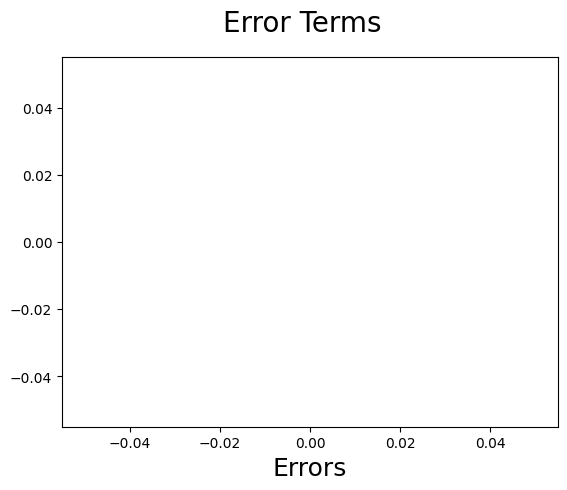

In [445]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

💡The major assumption of Linear Regression is that the **errors are normally distributed** and it is clearly visible from above

---

#### 💡Insights - Using Manual Feature Elimiation:
   - The R-Squared of Manual Feature Elimiation was : **0.795**
   - Features in the model were: ['temp', 'season', 'windspeed', 'yr', 'weathersit', 'holiday']
   - Features dropped were: [('mnth', 'high p-value'), ('weekday', 'high p-value'), ('workingday', 'high p-value'), ('hum', 'high VIF')]

#### 💡Insights - Using RFE (Recursive Feature Elimination):
   - The R-Squared was : **0.794**
   - Features in the model were: ['season', 'yr', 'weathersit', 'temp', 'hum', 'windspeed']
   - Features dropped were: ['mnth', 'holiday', 'weekday', 'workingday']

---

#### 2.2.🧑‍💻🎯Model Evaluation (25%):
When you're done with:
 - model building
 - residual analysis 
 - Predictions on the test set
 
Just make sure you use the following two lines of code to calculate the R-squared score on the test set.

``` Python
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
```
 
where, 
 - `y_test` is the test data set for the target variable, and 
 - `y_pred` is the variable containing the predicted values of the target variable on the test set.

💡**Note**: Please don't forget to perform this step as the R-squared score on the test set holds some marks. 

The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

##### Plot the y_test Vs y_pred_m4 model

ValueError: x and y must be the same size

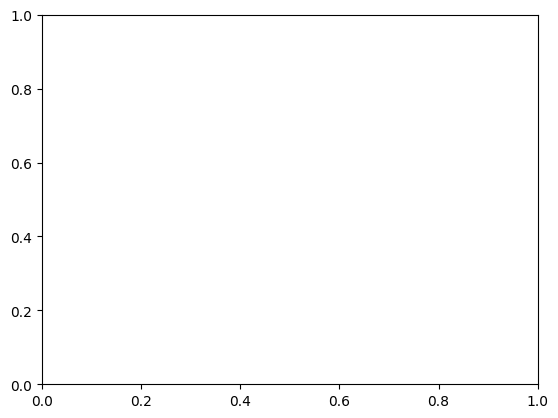

In [446]:
# Plotting y_test and y_pred_m4 to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred_m4', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

##### Get the r2_score of the model using Manual Feature Elimination

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [2772, 6468]

##### Get the equation of the model

In [233]:
model_toolkit.get_model_ols_params(lm)

const                                                NaN
TotalVisits                                          NaN
Total Time Spent on Website                          NaN
Page Views Per Visit                                 NaN
Lead Origin_Landing Page Submission                  NaN
                                                      ..
Last Notable Activity_Resubscribed to emails         NaN
Last Notable Activity_SMS Sent                       NaN
Last Notable Activity_Unreachable                    NaN
Last Notable Activity_Unsubscribed                   NaN
Last Notable Activity_View in browser link Clicked   NaN
Length: 175, dtype: float64


*cnt = 0.166303 + 0.126584 ∗ season + 0.235810 ∗ yr - 0.095565 * holiday - 0.187021 * weathersit + 0.467522 * temp - 0.148497 * windspeed*

### 🎯Conclusion and Business Insights:
- **Inventory Management** - The above multiple linear regression equation helps the business to maintain sufficient inventory of bikes depedning on **cyclic factors** such as *season, weathersit, holiday, yr* in long term and short term
- **Maintenance Window** - *BoomBikes* can plan their maintenance of bikes by **replacing tyres and servicing** for winter and colder weather and additionally providing *wintor gears*.
- **Discount** - Factors like *holiday*, *weathersit* and *windspeed* are having inverse effect on the overall users. This can be lead to more vehicles stationed. Offering some discount on *holiday* can bring in more customers


---

## 3️⃣✍️Subjective Questions (~10%):

✅Meets expectations
 - The answer to the subjective questions are clear, concise and to the point.
 - No assumptions are made and the reasons behind the answers are explained clearly.

❌Does not meet expectations
 - The answers are incorrect or unnecessarily long.
 - The assumptions, if any, behind the answers, are not explained and the reasons behind the answers are not given clearly.

### ⏩Assignment-Based Subjective Questions
Please refer the [Assignment PDF](Bike-Sharing-Assignment-Subjective-Questions.pdf)

### ⏩Answers for General Subjective Questions 

Please refer the [Assignment PDF](Bike-Sharing-Assignment-Subjective-Questions.pdf)


 ---

## 4️⃣Presentation and Recommendations (~10%)

✅Meets expectations
 - The presentation has a clear structure, is not too long, and explains the most important results concisely in simple language.
 - The recommendations to solve the problems are realistic, actionable and coherent with the analysis.
 - If any assumptions are made, they are stated clearly.

❌Does not meet expectations
 - The presentation lacks structure, is too long or does not put emphasis on the important observations. The language used is complicated for business people to understand.
 - The recommendations to solve the problems are either unrealistic, non-actionable or incoherent with the analysis.
 - Contains unnecessary details or lacks the important ones.
 - Assumptions made, if any, are not stated clearly.

---

## 5️⃣ Summary Report (~5%)

✅Meets expectations
 - The process followed and all the learnings are clearly mentioned.
 - The report is neither too detailed nor too brief. The 500-word word limit is followed.

❌Does not meet expectations
 - The process followed and learnings are not mentioned clearly and the report keeps deviating from it.
 - The report is too brief or too detailed, i.e., it doesn't stick to the 500-word word limit.


---

## 6️⃣ Conciseness and readability of the code (~5%)

✅Meets expectations
 - The code is concise and syntactically correct. Wherever appropriate, built-in functions and standard libraries are used instead of writing long code (if-else statements, for loops, etc.).
 - Custom functions are used to perform repetitive tasks.

❌Does not meet expectations
 - Long and complex code used instead of shorter built-in functions.
 - Custom functions are not used to perform repetitive tasks resulting in the same piece of code being repeated multiple times.
 - Code readability is poor because of vaguely named variables or lack of comments wherever necessary.

---

## 💼Submissions:

 - **Python Notebook**: One Python notebook with the whole linear model, predictions, and evaluation. [Lead Scoring Jupyter Notebook](./lead-scoring-case-study.ipynb)
 - **Word File (Subjective Questions)**: Answer all the questions asked by the company in the word document provided. [Word File - Subjective Questions](./lead-scoring-assignment-subject-questions.docx) 
 - **Presentation PDF**:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format - [Lead Scoring Presentation](./lead-scoring-case-study.pdf)
 - **Summary Report PDF**: Apart from the Python notebook, you also need to answer some subjective questions related to logistic regression which can be downloaded from the file below. Answer these questions and submit it as a PDF. [Lead Scoring Summary Report](lead-scoring-case-study-summary.pdf)
 - **README File**: Containing the summary about this case study. [README.md](./README.md)

💡`Note`: There are some questions in the subjective questions doc that you might not be familiar with. So you're expected to research these questions and give an appropriate answer in order to expand your learnings of this topic.

---

## 📖References:
The dataset and data dictionary can be get from link given below:

 - [lead-scoring.csv](https://github.com/vmahawar/data-science-datasets-collection/raw/main/lead-scoring.csv)

---
